In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/home/prasun/GitDemo/Time_Trekking/Dataset/book_sales.csv",
                 index_col="Date", parse_dates=["Date"]).drop(["Paperback"],axis="columns")
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [4]:
# time-step feature (time-dependence)
df["Time"] = np.arange(len(df.index))

In [5]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

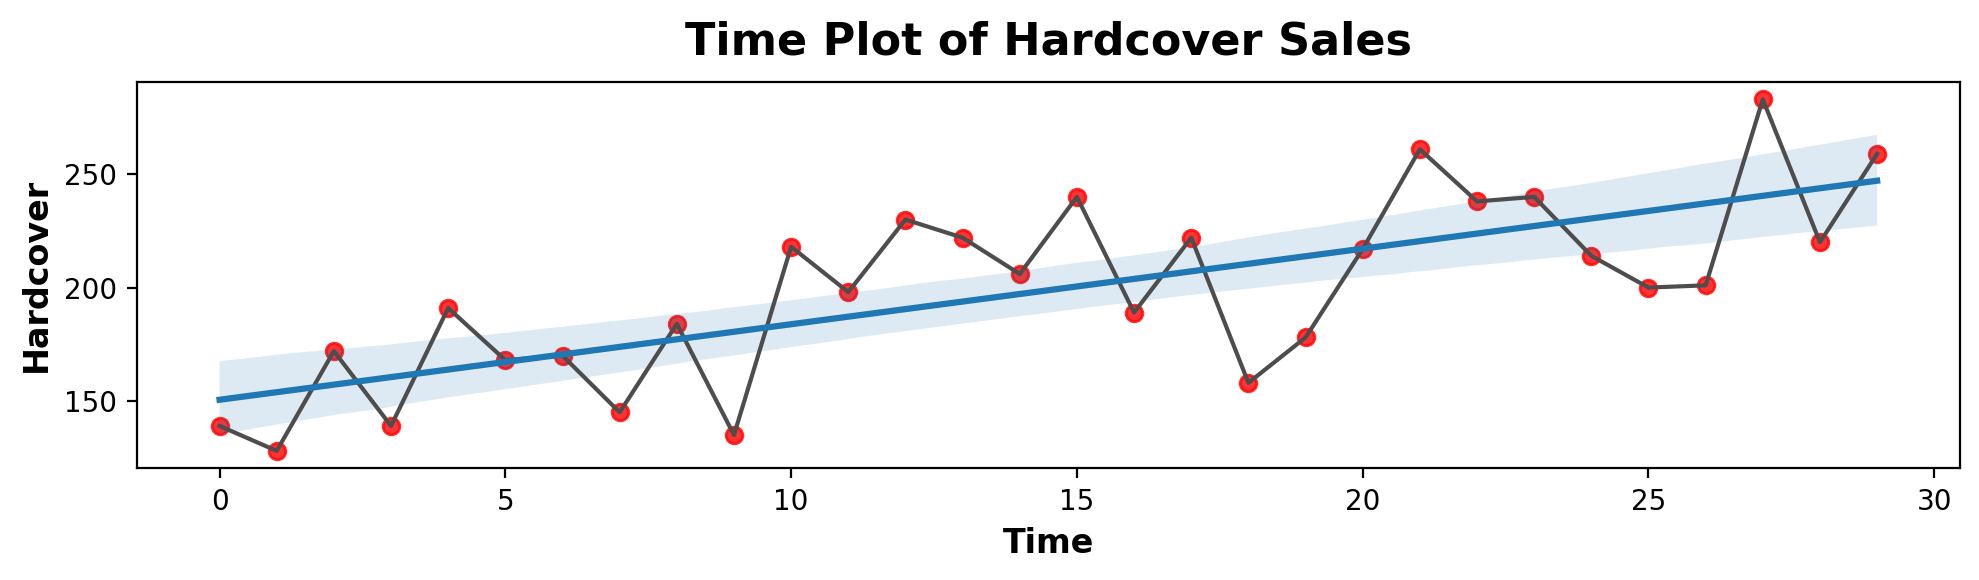

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc(
    "figure",
    autolayout=True,
    figsize=(10, 3),
    titlesize=8,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.3')
ax = sns.regplot(x='Time', y='Hardcover', data=df, scatter_kws=dict(color='red'))
ax.set_title('Time Plot of Hardcover Sales')

In [7]:
#Lag-Feature (Shift as if they occurred later in time)
df["lag_1"] = df["Hardcover"].shift(1)
df= df.reindex(columns=["Hardcover","lag_1"])
df.head()

,Hardcover,lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

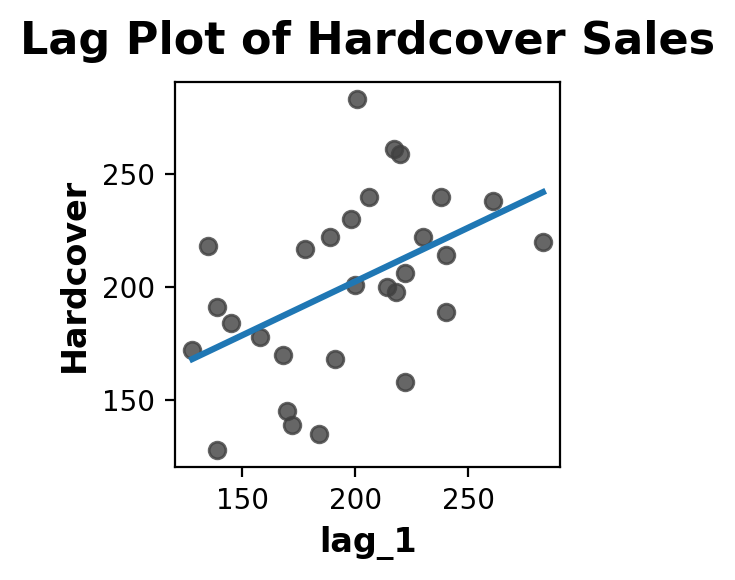

In [8]:
#Lag_Plot (Plotting observation along with their corresponding lag_feature)
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

- Clearly depicts sequential dependence
- Hence lag-feature is useful in this case

In [9]:
# Exploring Tunnel Traffic
df1 = pd.read_csv("/home/prasun/GitDemo/Time_Trekking/Dataset/tunnel.csv",index_col= "Day",parse_dates= ["Day"])
df1.head()


,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [10]:
#Introducing Time-Feature
df_time = df1.copy()
df_time["Time"] = np.arange(df1.shape[0])
df_time.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [11]:
df_time.Time.dtypes

dtype('int64')

In [12]:
#Fitting Linear Regression model on time-feature
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#Training Data_Segregation
X = df_time[["Time"]]
y = df_time[["NumVehicles"]]

#Fitting the Model
reg.fit(X,y)

#Prediction
y_pred = pd.Series(reg.predict(X)[:,0], index=X.index)
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Length: 747, dtype: float64

In [13]:
# Exploring Weights
print(f"The Model is as follows-\n{reg.coef_}* Time_Step + {reg.intercept_}")

The Model is as follows-
[[22.49744953]]* Time_Step + [98176.20634409]


In [15]:
df_time.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

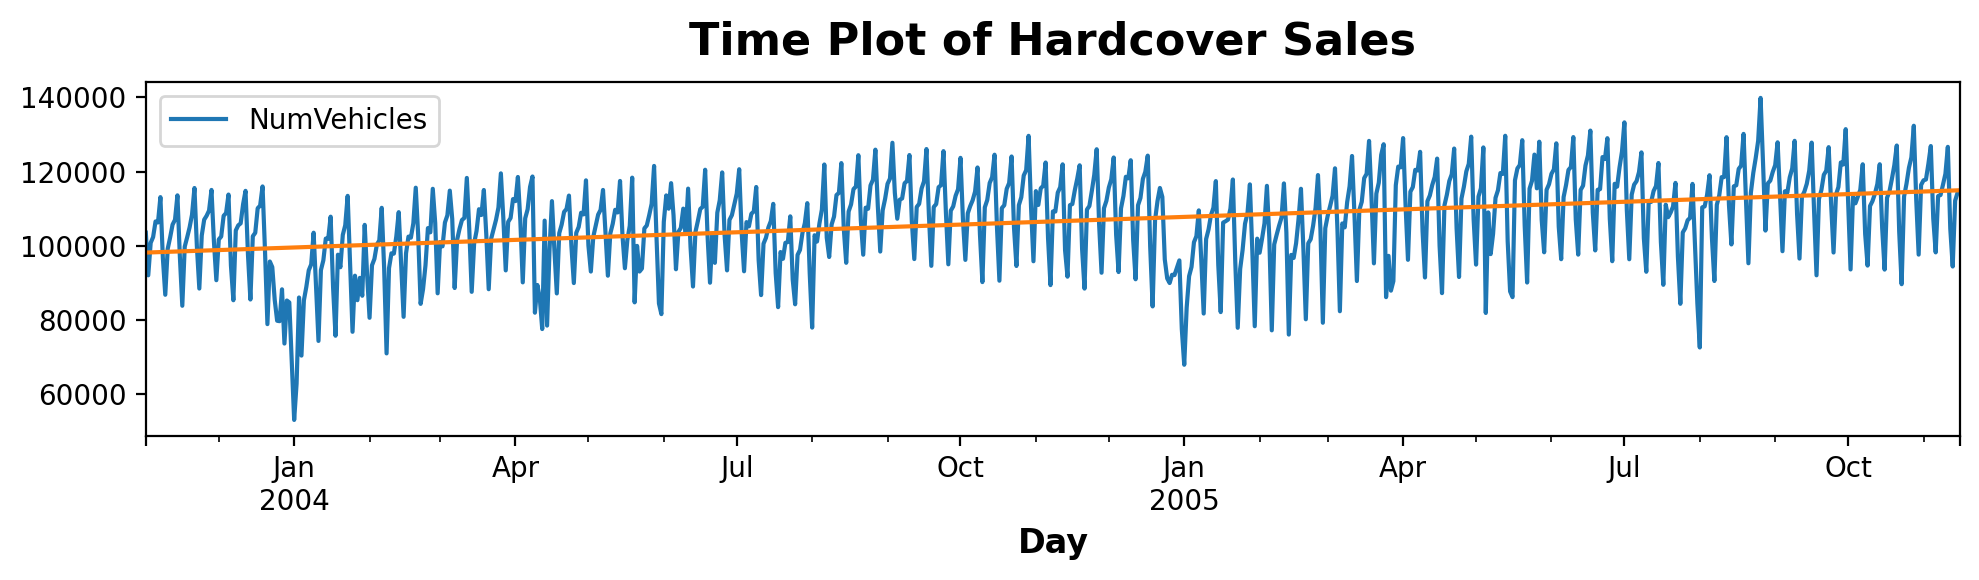

In [27]:
ax = y.plot()
ax = y_pred.plot(ax=ax)
ax.set_title('Time Plot of Hardcover Sales')